# CS722 Machine Learning 

## Assignment 3 | Herambeshwar pendyala | 01130541

### Problem 1 :
Please derive the gradient of the loss function in logistic regression (i.e., the logistic loss as shown in below) with respect to w, which is a vector and the model parameter.

<!-- ![optimization Problem](https://www.cs.odu.edu/~hpendyal/courses/cs722/images/hw3-1.PNG)
 -->
\begin{equation*}
L(w) = \sum_{i=1}^N log(1+exp(x_i^Tw)) - y_ix_i^Tw
\end{equation*}

where (𝐱𝑖, 𝑦𝑖) represents the 𝑖-th example, 𝐱𝑖 being data vector for input variables and 𝑦𝑖 being the label. 𝑁 is the total number of examples in the data.

### Solution : 

given equation
\begin{equation*}
L(w) = \sum_{i=1}^N log(1+exp(x_i^Tw)) - y_ix_i^Tw
\end{equation*}

Differentiating the above equation partially w.r.t 'w' will give us the gradient, the equation is given below. 
\begin{align}
\frac{\partial L(w)}{\partial t}\ = \sum_{i=1}^N \frac{e^{(x_i^Tw)}}{1+e^{(x_i^Tw)}}\ x_i^T - y_ix_i^T 
\end{align}

we can take  $x_i^T$ common, then equation becomes as below. 
  
\begin{equation*}
\frac{\partial L(w)}{\partial t}\ = \sum_{i=1}^N x_i^T(\frac{e^{(x_i^Tw)}}{1+e^{(x_i^Tw)}}\ -y_i)
\end{equation*}

here we know $\sigma(x) =  \frac{e^x}{1 + e^x}$, so we can substitute $\sigma(x_i^Tw)$ in place of $\frac{e^(x_i^Tw)}{1 + e^(x_i^Tw)}$ now the above equation is updated as:

\begin{align}
\frac{\partial L(w)}{\partial t}\ = \sum_{i=1}^N x_i^T(\sigma(x_i^Tw) -y_i)
\end{align} 

if we substitute $X = \sum_{i=1}^N x_i$ and $Y = \sum_{i=1}^N y_i$ then the gradient will look like

\begin{align}
\frac{\partial L(w)}{\partial t}\ = X^T(\sigma(X^Tw) - Y)
\end{align} 

***Final Gradient*** is 

\begin{align}
\nabla L(w) = X^T(\sigma(X^Tw) - Y)
\end{align}


### problem 2
Program your own logistic regression classifier (Python is preferred) by implementing a gradient decent algorithm to find the optimal w that minimizes the logistic loss in
Problem 1. That is to find solution to the following optimization problem:
<!--![optimization Problem-coding](https://www.cs.odu.edu/~hpendyal/courses/cs722/images/hw3-2.PNG)-->

\begin{equation*}
L(w) = \sum_{i=1}^N log(1+exp(x_i^Tw)) - y_ix_i^Tw
\end{equation*}



In [1]:
#--- import libraries
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score

#--- initialize parameters
def initParams(dims):
  w = np.zeros((dims,1))
  return w

#--- sigmoid function
def sigmoid(z):
  return 1/(1+np.exp(-z))

#--- function to calculate logistic loss
def logisticLoss(X,Y,w):
  z = np.dot(X,w)
  h = sigmoid(z)
  #print('--> h : ',h)
  #print('--> Y : ',Y)
  cost = (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()
  #A = h-Y
  #print('--> A : ',A)
  dw = np.dot(X.T, (h-Y))/Y.size
  #print('h-Y : ',A.shape)
  return dw, cost

#--- gradient Descent
def gradientDescent(X,Y,w,learning_rate=0.1, num_iterations=100, print_cost = False):
  costs = []
  #print('before--> ',w)
  #print('before--> ',w.shape)
  for i in range(num_iterations):
    dw, cost = logisticLoss(X,Y,w)
    #print(dw)
    w = w - learning_rate * dw
    #print(w)
    #print(w.shape)
    if print_cost and (i%1000 == 0):
      costs.append(cost)
      print("Cost after iteration %i : %f"%(i,cost))
  return w, dw, costs

#--- function to return prdicted probabilities
def predict_prob(X,w):
  #print('--> prob X : ',X.shape)
  z = np.dot(X,w)
  Y_prob = sigmoid(z)
  #print('--> prob Y : ',Y_prob.shape)
  return Y_prob

#--- function to predict class
def predictClass(X,w,threshold):
  y_pred = []
  y_prob = predict_prob(X,w)
  for i in range(len(y_prob)):
    if(y_prob[i] >= threshold):
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

#--- logistic regression classifier
def logistic(X_train, Y_train, X_test, Y_test, learning_rate = 0.1, num_iterations = 1, print_cost = False, threshold = 0.5):
  #--- initialize the parameters (w in this case)
  w = initParams(X_train.shape[1])
  #--- calculate cost
  #--- update the parameters using gradientDescent
  w,dw,costs = gradientDescent(X_train, Y_train, w, learning_rate, num_iterations, print_cost)
  #print(w.shape)
  #--- predict the probabilities and get predicted_y for train.
  y_prob_train = predict_prob(X_train, w)
  y_prob_test = predict_prob(X_test, w)
  #--- predict the probabilities and get predicted_y for test.
  y_pred_train = predictClass(X_train,w,threshold)
  y_pred_test = predictClass(X_test,w,threshold)
  Y_train = np.squeeze(Y_train)
  Y_test = np.squeeze(Y_test)
  #print(len(y_pred_train),' ',len(Y_train))
  #print(len(y_pred_test),' ',len(Y_test))
  #--- calculate the accuracy
  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - Y_test)) * 100))
  #--- return all of them in a dictionary
  result = {
      "costs" : costs,
      "Y_Prediction_Test" : y_pred_test,
      "Y_Prediction_Train" : y_pred_train,
      "Y_prob_train":y_prob_train,
      "Y_prob_test":y_prob_test,
      "w" : w,
      "learning_rate" : learning_rate,
      "num_iterations" : num_iterations
  }
  return result

In [2]:
#--- Plotting the cost
import matplotlib.pyplot as plt
%matplotlib inline
# Plot learning curve (with costs)
def plotlearningCurve(results):
  costs = np.squeeze(results['costs'])
  plt.figure( figsize=(12,10))
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations (per thousands)')
  plt.title("Learning rate =" + str(results["learning_rate"]))
  plt.show()


(150, 2)
(150, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Cost after iteration 0 : 0.693147
Cost after iteration 1000 : 0.677959
Cost after iteration 2000 : 0.665700
Cost after iteration 3000 : 0.655777
Cost after iteration 4000 : 0.647715
Cost after iteration 5000 : 0.641135
Cost after iteration 6000 : 0.635739
Cost after iteration 7000 : 0.631289
Cost after iteration 8000 : 0.627595
Cost after iteration 9000 : 0.624507
train accuracy: 66.0 %
test accuracy: 68.0 %


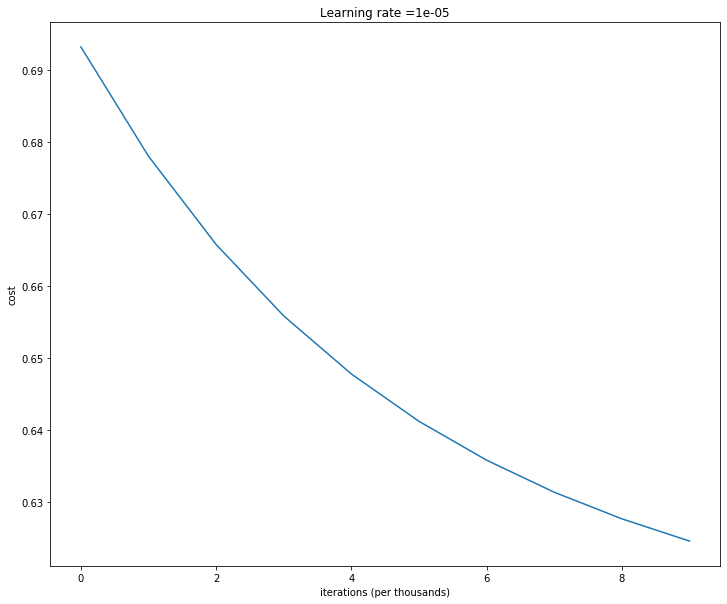

In [3]:
#--- Testing the logistic regression function
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
y = y.reshape((y.shape[0],1))
print(X.shape)
print(y.shape)
#print(y)
print(np.squeeze(y))

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
d = logistic(X_train, Y_train, X_test, Y_test, 0.00001,  10000, True)
#Y_Prediction_Train = d['Y_Prediction_Train']
plotlearningCurve(d)

### Problem 3 
Program (with python preferred) a function that plots an ROC curve with input of a
vector containing the true label and another vector containing the predicted probabilities
of class membership for a set of examples.



In [4]:
x = np.linspace(0, 1, num=100) #--- print 100 numbers between 0 to 1
#print(x)

In [5]:
#a = np.array([1,1,1,1,1,0,0,0,1]) #--- actual
#b = np.array([1,0,0,0,1,0,1,1,1]) #--- predicted
#print('Actual    - ',a)
#print('Predicted - ',b)

def confusionMatrix(actual, predicted, printResult = False):
  TP, FP, TN, FN = 0,0,0,0
  for a,p in zip(actual,predicted) :
    if ((a == p) and a == 1): #-- True Positive
      TP+=1
    if ((a == p) and a == 0): #-- True Negative
      TN+=1
    if ((a != p) and a == 1): #-- False Negative
      FN+=1
    if ((a != p) and a == 0): #-- False Positives
      FP+=1
  if(printResult):
    print('--- Confusion Matrix ---')
    print('- Predicted = yes ---- Predicted = No --------')
    print('Actual - Yes TP : ',TP , ' | FN : ', FN)
    print('Actual - No  FP : ',FP , ' | TN : ', TN)
  return {'TP':TP,'FN':FN,'FP':FP,'TN':TN}


probs = d['Y_prob_train']
probs = np.squeeze(probs)
y_preds = d['Y_Prediction_Train']
y_original = np.squeeze(Y_train)
print(len(y_original))
#print(probs.shape)
#print(y_preds.shape)
#print(y_original.shape)
confusionMatrix(y_original, y_preds,True)

100
--- Confusion Matrix ---
- Predicted = yes ---- Predicted = No --------
Actual - Yes TP :  66  | FN :  0
Actual - No  FP :  34  | TN :  0


{'TP': 66, 'FN': 0, 'FP': 34, 'TN': 0}

In [6]:
def calc_threshold(actuals, scores, threshold=0.5, positive_label=1):
    tp=fp=tn=fn=0
    #bool_actuals = [act==positive_label for act in actuals]
    #for truth, score in zip(bool_actuals, scores):
    for score,actual in zip(scores,actuals):
        if score >= threshold:                     # predicted positive 
            if actual == positive_label:           # actually positive 
                tp += 1
            else:                                  # actually negative              
                fp += 1          
        else:                                      # predicted negative 
            if not (actual == positive_label):     # actually negative 
                tn += 1                          
            else:                                  # actually positive 
                fn += 1
    return {'TP':tp,'FN':fn,'FP':fp,'TN':tn}
calc_threshold(y_original, probs,0.5,1)

{'TP': 66, 'FN': 0, 'FP': 34, 'TN': 0}

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotROC(Y,Yhat,probs):
  fig, ax = plt.subplots(1,1, figsize=(12,10))
  TPR = dict()
  FPR = dict()
  
  # generate thresholds over score domain 
  low = min(probs)
  high = max(probs)
  mid = (low+high)/2
  #print(low)
  #print(high)
  FPR_list, TPR_list, thresholds = roc_curve(y_original, probs)
  auc = roc_auc_score(y_original, probs)
  #Plotting final ROC curve
  ax.plot(FPR_list, TPR_list)
  #ax.plot(x,x, "--")
  # ax.plot([0, 1], [0, 1], 'k--')
  # ax.set_xlim([0,1])
  # ax.set_ylim([0,1])
  ax.set_title("ROC Curve", fontsize=15)
  ax.set_ylabel('TPR', fontsize=15)
  ax.set_xlabel('FPR', fontsize=15)
  ax.grid()
  ax.legend(["AUC=%.3f"%auc])
  fig.show()

#plotROC(a,b)

/home/heramb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


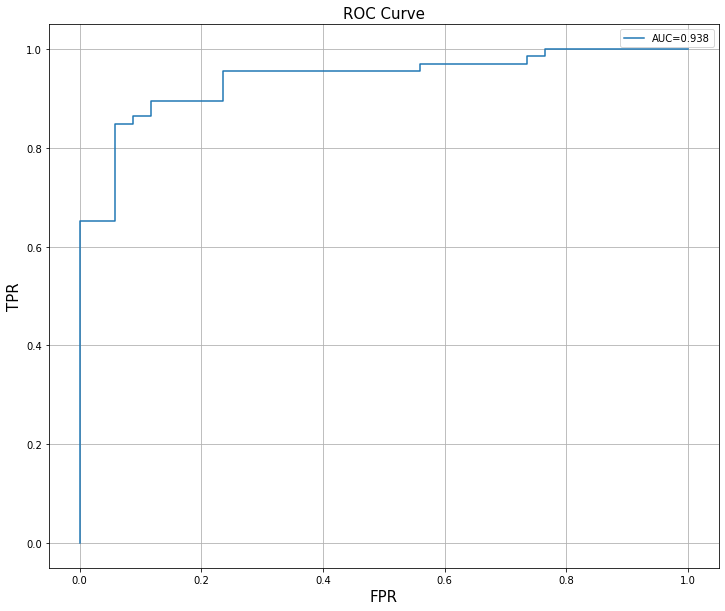

In [8]:
plotROC(y_original,y_preds,probs)

--> probs 100
--> thresholds :  39
--> fpr :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.08823529
 0.08823529 0.11764706 0.11764706 0.17647059 0.23529412 0.23529412
 0.23529412 0.23529412 0.26470588 0.32352941 0.35294118 0.41176471
 0.55882353 0.55882353 0.58823529 0.64705882 0.73529412 0.73529412
 0.76470588 0.76470588 1.        ]
--> tpr :  [0.         0.01515152 0.1969697  0.22727273 0.25757576 0.31818182
 0.36363636 0.39393939 0.54545455 0.57575758 0.65151515 0.65151515
 0.68181818 0.74242424 0.77272727 0.8030303  0.84848485 0.84848485
 0.86363636 0.86363636 0.89393939 0.89393939 0.89393939 0.90909091
 0.93939394 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545
 0.95454545 0.96969697 0.96969697 0.96969697 0.96969697 0.98484848
 0.98484848 1.         1.        ]
AUC Score (ROC Curve for Logistic Regression): 0.94 


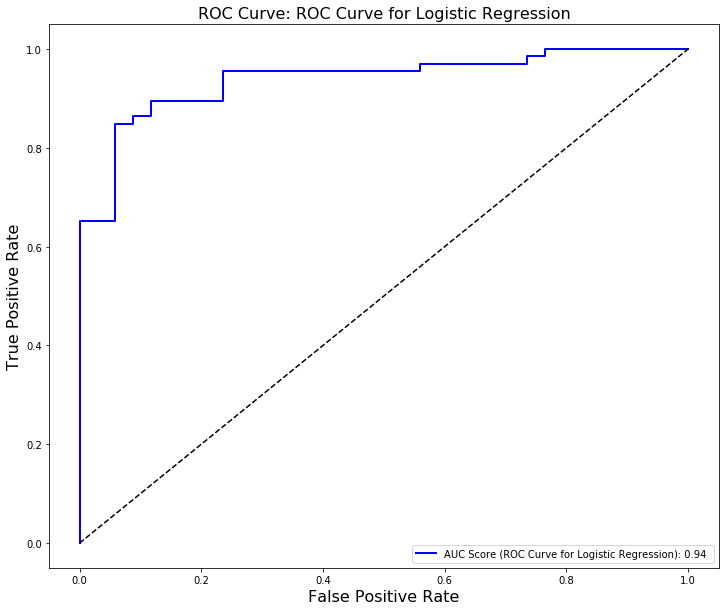

In [9]:
#--- Using Pre-defined function
from sklearn.metrics import roc_curve,roc_auc_score
def plotROCCurve(y_original, probs):
  title = 'ROC Curve for Logistic Regression'
  label = 'None'
  # calculate the ROC score
  fpr, tpr, thresholds = roc_curve(y_original, probs)
  print('--> probs',len(np.squeeze(probs)))
  print('--> thresholds : ',len(thresholds))
  print('--> fpr : ',fpr)
  print('--> tpr : ',tpr)
  print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs)))    
  label = 'AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs))
  # plot the ROC curve
  plt.figure( figsize=(12,10))
  plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC Curve: {}'.format(title), fontsize=16)
  plt.legend(loc='lower right')
  plt.show()

plotROCCurve(y_original,probs)

### problem 4
Apply your logistic regression classifier to the breast cancer Wisconsin dataset, which can either be loaded with python by following instructions here:

[breast-cancer-dataset-scikitlearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

or downloaded from

[breast-cancer-data UCI Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) .

Randomly splitting the data into two subsets with one having 2/3 of the examples and the other
having the rest 1/3. Use the 2/3 subset to train a logistic regression model and the 1/3 subset to
test the model. Plot the ROC curve on the testing set with your ROC plotting function.

In [10]:
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame,Series
import pandas as pd
#----- 0 - malignant
#----- 1 - Benign
data = load_breast_cancer()
#data
classes = data.target_names
print(classes)
print(data.DESCR)

['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fi

In [11]:
dataDF_X = DataFrame(data['data'],columns=data['feature_names']) #--- creating dataFrame with features
dataDF_Y = DataFrame(data['target'],columns=['target'])          #--- creating dataFrame with Labels
dataDF = dataDF_X.join(dataDF_Y)                                 #--- Merging the dataframes
print(len(dataDF_Y))
print(data['target'].shape)
dataDF.head()
#data = DataFrame(data)

569
(569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
#--- Checking for missing data
#dataDF.isnull().sum() #--- no column has null data
#dataDF.isna().sum()    #--- no column has NAN data in it

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataDF_X, dataDF_Y, test_size = 0.33, random_state = 0)

In [13]:
#---- Question 4 -- using custom logistic classifier
#%%time
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame,Series
import pandas as pd

data = load_breast_cancer()
#data
classes = data.target_names
#--- Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataDF_X, dataDF_Y, test_size = 0.33, random_state = 1)
d = logistic(X_train, Y_train, X_test, Y_test, 0.00001,  10000, True)

Cost after iteration 0 : 0.693147
Cost after iteration 1000 : 0.254450
Cost after iteration 2000 : 0.227522
Cost after iteration 3000 : 0.216847
Cost after iteration 4000 : 0.211264
Cost after iteration 5000 : 0.207845
Cost after iteration 6000 : 0.205505
Cost after iteration 7000 : 0.203760
Cost after iteration 8000 : 0.202371
Cost after iteration 9000 : 0.201208
train accuracy: 91.60104986876641 %
test accuracy: 92.55319148936171 %


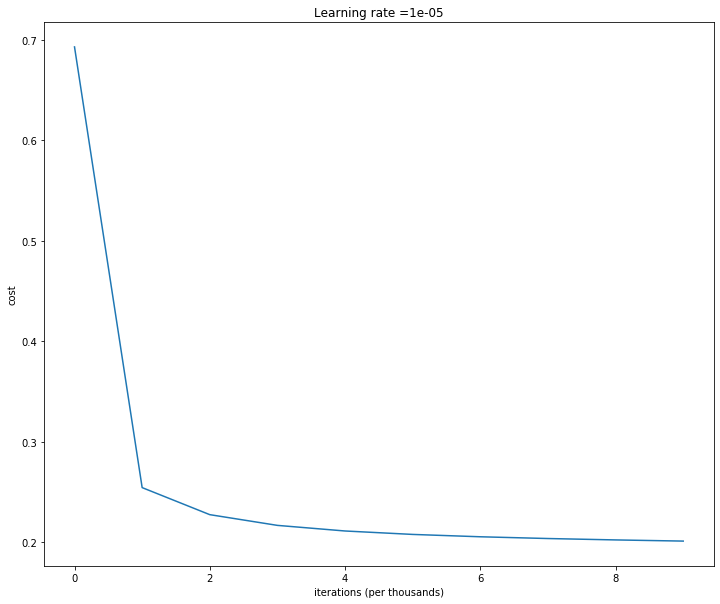

In [17]:
plotlearningCurve(d)

/home/heramb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


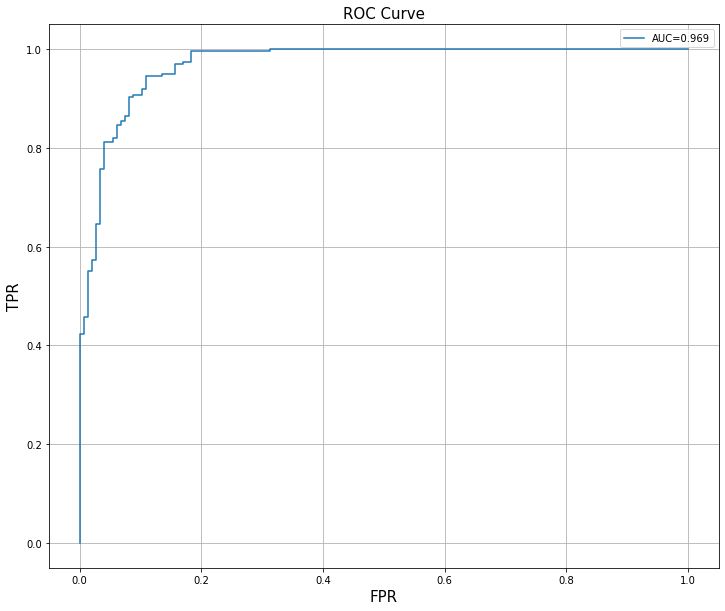

In [18]:
#--- ROC Curve - Custom build
probs = d['Y_prob_train']
y_preds = d['Y_Prediction_Train']
y_original = np.squeeze(Y_train)
plotROC(y_original,y_preds,probs)

--> fpr :  [0.         0.         0.         0.00680272 0.00680272 0.01360544
 0.01360544 0.02040816 0.02040816 0.02721088 0.02721088 0.03401361
 0.03401361 0.04081633 0.04081633 0.05442177 0.05442177 0.06122449
 0.06122449 0.06802721 0.06802721 0.07482993 0.07482993 0.08163265
 0.08163265 0.08843537 0.08843537 0.10204082 0.10204082 0.10884354
 0.10884354 0.13605442 0.13605442 0.15646259 0.15646259 0.17006803
 0.17006803 0.18367347 0.18367347 0.31292517 0.31292517 1.        ]
--> tpr :  [0.         0.0042735  0.42307692 0.42307692 0.45726496 0.45726496
 0.55128205 0.55128205 0.57264957 0.57264957 0.64529915 0.64529915
 0.75641026 0.75641026 0.81196581 0.81196581 0.82051282 0.82051282
 0.84615385 0.84615385 0.85470085 0.85470085 0.86324786 0.86324786
 0.9017094  0.9017094  0.90598291 0.90598291 0.91880342 0.91880342
 0.94444444 0.94444444 0.94871795 0.94871795 0.97008547 0.97008547
 0.97435897 0.97435897 0.9957265  0.9957265  1.         1.        ]
AUC Score (ROC Curve for Logistic Regr

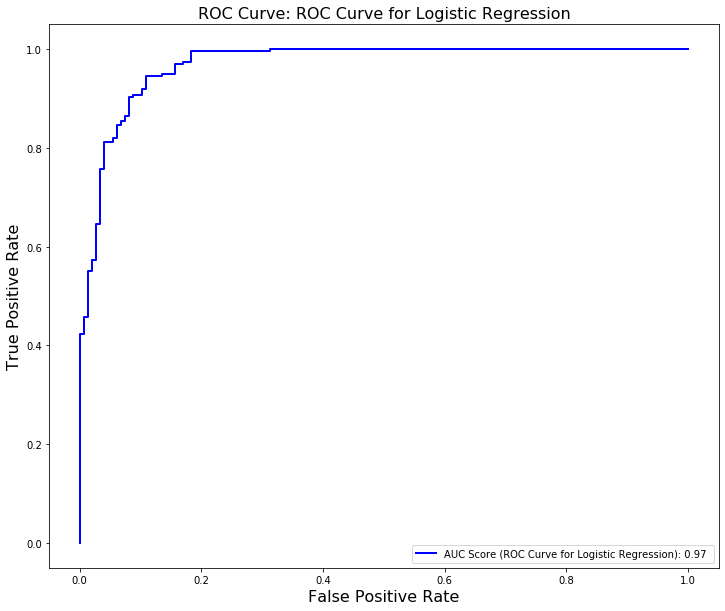

In [19]:
#--- Using Pre-defined function
title = 'ROC Curve for Logistic Regression'
label = 'None'
# calculate the ROC score
fpr, tpr, thresholds = roc_curve(y_original, probs)
#print('--> probs',np.squeeze(probs))
#print('--> thresholds : ',thresholds)
print('--> fpr : ',fpr)
print('--> tpr : ',tpr)
print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs)))    
label = 'AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs))
# plot the ROC curve
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve: {}'.format(title), fontsize=16)
plt.legend(loc='lower right')
plt.show()

/home/heramb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/heramb/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 257.44, 'Predicted label')

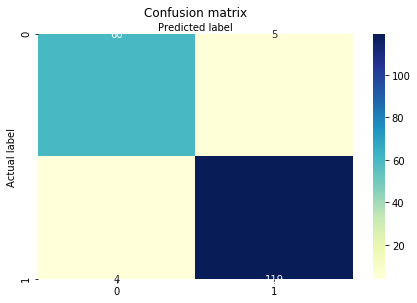

In [20]:
#--- Using Logistic Regression Algorithm to the Training Set Predefined model library
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
#--- test the trained classifer
Y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
 #--- checking the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
#---- plotting confusion matrix
class_names=classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
Y_proba = classifier.predict_proba(X_test)
#print('predicted probabilities',y_score[:])
cs_score = classifier.score(X_test, Y_test)
print('test accuracy -',cs_score)

test accuracy - 0.9521276595744681


AUC Score (ROC Curve for Logistic Regression): 0.99 


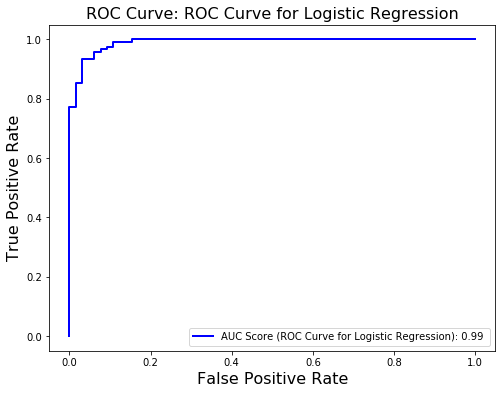

In [22]:
#---- ROC Curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve
from itertools import cycle
import matplotlib.pyplot as plt
%matplotlib inline

#--- 0 ---- Malignant - Harmful
#--- 1 ---- Benign - Not Harmful

# Compute ROC curve and ROC area for each class
title = 'ROC Curve for Logistic Regression'
label = 'None'
# calculate the ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_test, y_pred_proba)))    
label = 'AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_test, y_pred_proba))
# plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve: {}'.format(title), fontsize=16)
plt.legend(loc='lower right')
plt.show()

### Points
- Problem 1 : derved the gradient of the loss Function.

Gradient : $\nabla L(w) = X^T(\sigma(X^Tw) - Y)$

- Problem 2 : Built a logistic regression classifier using Gradient Descent Algorithm. 
- Problem 3 : Built a function to plot ROC curve calculate AUC of the curve.
- problem 4 : Applied logistic regression classifier to the breast cancer Wisconsin dataset, predicted malignant tumours with a prediction accuracy of 93%. 